# Learning Curves

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [5]:
coursework=pd.read_csv(r"C:\Users\tiwar\OneDrive\Desktop\CourseWork_cleaned_data.csv")

In [6]:
coursework.head()

,MSSubClass_N,MSZoning_N,LotFrontage_log,LotArea_log,LotShape_N,HouseStyle_N,OverallQual,OverallCond,Foundation_N,BsmtQual_N,...,Heating_N,HeatingQC_N,SaleCondition_N,GarageCond_N,GarageQual_N,FireplaceQu_N,Electrical_N,KitchenQual_N,CentralAir_N,sales_log
0,5,5,4.174387,9.041922,0,3,7,5,2,5,...,2,1,1,3,3,0,1,2,1,12.247694
1,0,5,4.382027,9.169518,0,0,6,8,1,5,...,2,1,1,3,3,3,1,3,1,12.109011
2,5,5,4.219508,9.328123,1,3,7,5,2,5,...,2,1,1,3,3,3,1,2,1,12.317167
3,6,5,4.094345,9.164296,1,3,7,5,0,4,...,2,2,6,3,3,4,1,2,1,11.849398
4,5,5,4.430817,9.565214,1,3,8,5,2,5,...,2,1,1,3,3,3,1,2,1,12.429216


In [7]:
X=["MSSubClass_N","MSZoning_N","LotFrontage_log","LotArea_log","LotShape_N","HouseStyle_N","OverallQual","OverallCond","Foundation_N","BsmtQual_N","BsmtCond_N","Heating_N","HeatingQC_N","SaleCondition_N","GarageCond_N","GarageQual_N","FireplaceQu_N","Electrical_N","KitchenQual_N","CentralAir_N"]

In [8]:
y='sales_log'

In [9]:
train_sizes = range(1,1200,50)

In [11]:

train_sizes, train_scores, test_scores = learning_curve(estimator= LinearRegression(),
                                               X=coursework[X], y=coursework[y], cv=10, scoring='neg_root_mean_squared_error',
                                               # 50 different sizes of the training set
                                               train_sizes=train_sizes)

In [12]:
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)

In [13]:
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)

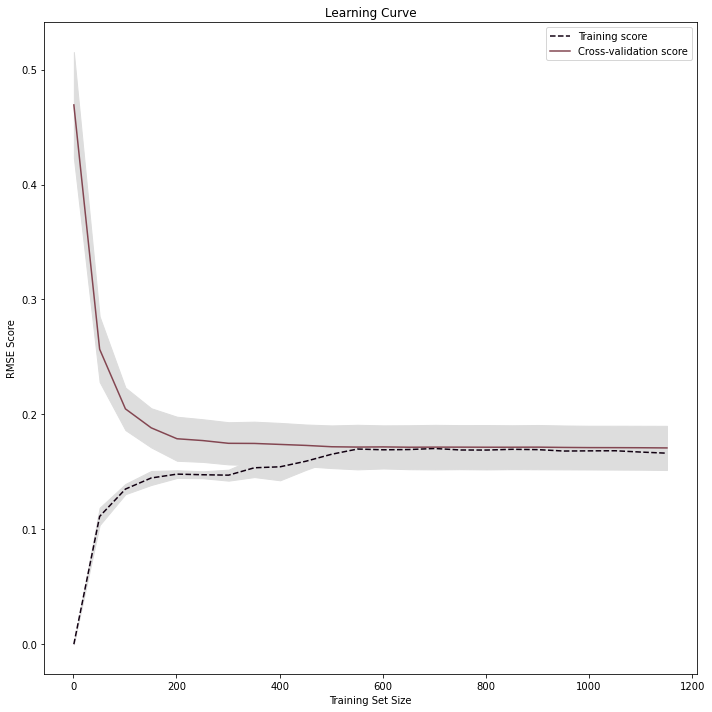

In [14]:
# Drawing lines
plt.subplots(1, figsize=(10,10) )
plt.plot(train_sizes, train_mean, '--', color="#110011",  label="Training score")
plt.plot(train_sizes, test_mean, color="#834651", label="Cross-validation score")

# Drawing bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Creating plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("RMSE Score"), plt.legend(loc="best")
plt.tight_layout();
plt.show()
